In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%ls

drive/  sample_data/


In [ ]:
% cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import glob

In [ ]:
list_of_all_imges = glob.glob('ColortypesDone[1-4]/*/*.jpg')

In [ ]:
list_of_all_imges[0]

'ColortypesDone3/spring/00003684.jpg'

In [ ]:
! pip install piq

     |████████████████████████████████| 112kB 8.8MB/s 
     |████████████████████████████████| 28.1MB 142kB/s 


In [ ]:
import torch
import piq
from skimage.io import imread

In [ ]:
list_of_all_images_quality_assesments = [] 

In [ ]:
for image_name in list_of_all_imges:
  image = torch.tensor(imread(image_name)).permute(2, 0, 1) / 255.

  brisque_index: torch.Tensor = piq.brisque(image, data_range=1., reduction='mean')

  list_of_all_images_quality_assesments.append([image_name, brisque_index.item()])


Downloading: "https://github.com/photosynthesis-team/piq/releases/download/v0.4.0/brisque_svm_weights.pt" to /root/.cache/torch/hub/checkpoints/brisque_svm_weights.pt


In [ ]:
list_of_all_images_quality_assesments = torch.load('list_of_all_images_quality_assesments.txt')

In [ ]:
list_of_all_images_quality_assesments

[['ColortypesDone3/spring/00003684.jpg', 69.52313232421875],
 ['ColortypesDone3/spring/00007582.jpg', 36.79461669921875],
 ['ColortypesDone3/spring/00009974.jpg', 56.43817138671875],
 ['ColortypesDone3/spring/00003322.jpg', 83.06463623046875],
 ['ColortypesDone3/spring/00000359.jpg', 46.54119873046875],
 ['ColortypesDone3/spring/00012985.jpg', 44.94305419921875],
 ['ColortypesDone3/spring/00011297.jpg', 35.41180419921875],
 ['ColortypesDone3/spring/00012211.jpg', 48.59442138671875],
 ['ColortypesDone3/spring/00007345.jpg', 80.79412841796875],
 ['ColortypesDone3/spring/00005230.jpg', 50.10516357421875],
 ['ColortypesDone3/spring/00010365.jpg', 63.20721435546875],
 ['ColortypesDone3/spring/00003523.jpg', 60.10174560546875],
 ['ColortypesDone3/spring/00001651.jpg', 54.94549560546875],
 ['ColortypesDone3/spring/00004846.jpg', 55.02264404296875],
 ['ColortypesDone3/spring/00012981.jpg', 41.75848388671875],
 ['ColortypesDone3/spring/00004313.jpg', 43.87127685546875],
 ['ColortypesDone3/sprin

In [ ]:
print(len(list_of_all_imges))
print(len(list_of_all_images_quality_assesments))

6503
6503


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
'1'.isnumeric()

True

In [ ]:
def fun(x):
  x[1] = format(float(x[1]), '.2f')
  return x

In [ ]:
list_of_all_images_quality_assesments = np.apply_along_axis(fun, 1, list_of_all_images_quality_assesments)

In [ ]:
list_of_all_images_quality_assesments

array([['ColortypesDone3/spring/00003684.jpg', '69.52'],
       ['ColortypesDone3/spring/00007582.jpg', '36.79'],
       ['ColortypesDone3/spring/00009974.jpg', '56.44'],
       ...,
       ['ColortypesDone1/summer/00000243.jpg', '38.93'],
       ['ColortypesDone1/summer/00000287.jpg', '35.18'],
       ['ColortypesDone1/summer/00000288.jpg', '44.86']], dtype='<U55')

In [ ]:
#torch.save(list_of_all_images_quality_assesments, 'list_of_all_images_quality_assesments.txt')

In [ ]:
list_of_all_images_quality_assesments = np.array(list_of_all_images_quality_assesments)
all_quality = np.asarray(list_of_all_images_quality_assesments[:, 1], dtype = np.float64, order ='C')
#all_quality = sorted(all_quality)

In [ ]:
all_quality

array([69.52, 36.79, 56.44, ..., 38.93, 35.18, 44.86])

In [ ]:
max(all_quality)

182.42

In [ ]:
min(all_quality)

1.64

In [ ]:
list_of_all_images_quality_assesments[np.where(np.isin(list_of_all_images_quality_assesments[:, 0], 'ColortypesDone4/непонятно/00000855.jpg'))]

array([], shape=(0, 2), dtype='<U55')

In [ ]:
all_quality_sorted = np.sort(all_quality)

In [ ]:
print(all_quality_sorted)

[  1.64   9.18   9.36 ... 180.75 182.42 182.42]


In [ ]:
list_of_all_images_quality_assesments[np.where(np.isin(list_of_all_images_quality_assesments[:, 1], str(all_quality_sorted[-40])))]

array([['ColortypesDone4/непонятно/00001001.jpg', '122.65']], dtype='<U55')

(array([-25.,   0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 10 Text major ticklabel objects>)

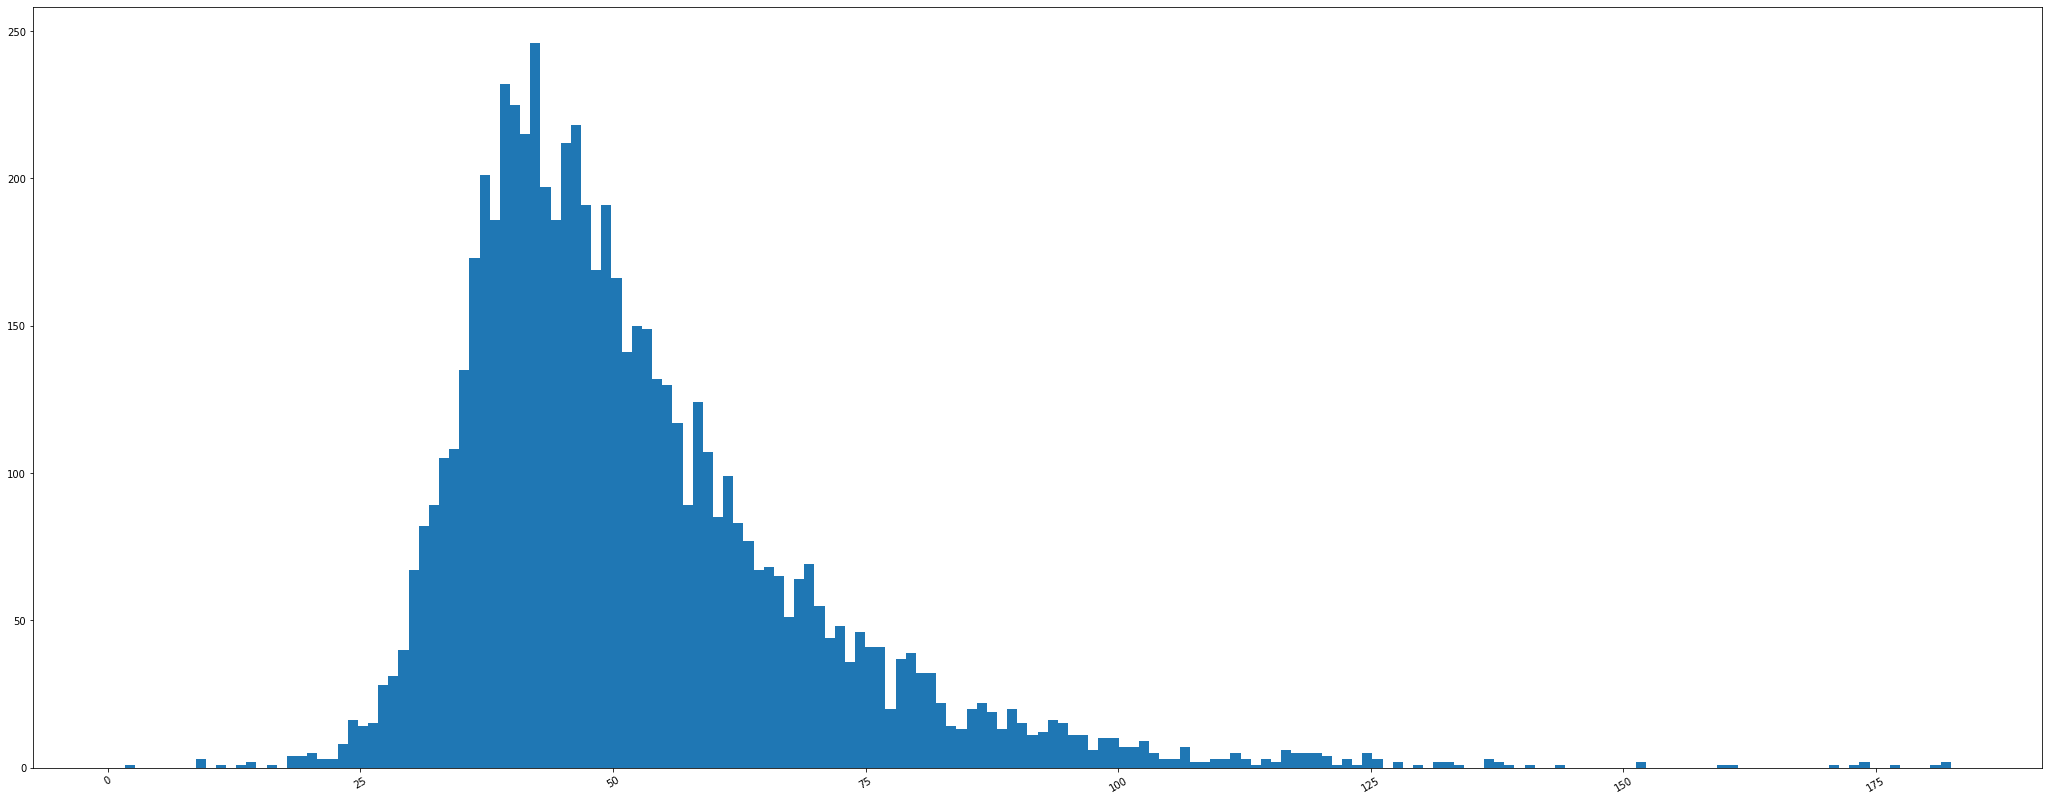

In [ ]:
plt.figure(figsize=(36, 14))
plt.hist(all_quality_sorted, bins=180)
plt.xticks(rotation=30)

In [ ]:
6503*0.3

1950.8999999999999

In [ ]:
all_quality_sorted[2400]

43.63